In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OrdinalEncoder
# pd.get_dummies(df[[categorical, categorical]])


url = "C:/Users/Nimrod/Documents/GitHub/2nd_try_iron_repo/week4/Data_Marketing_Customer_Analysis_Round3.csv"

df = pd.read_csv(url)

In [2]:
# check if there are highly correlated features and drop them (if there are any).

cat_df = df.select_dtypes(exclude='number')
num_df = df.select_dtypes(include='number')

cat_df.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [3]:
cat_df.nunique()

# vehicle_class = ordinal 
# vehicle_size = ordianl 
# coverage = ordinalEncoder
# education = ordinalEncoder
# region = ordinalEncoder
# employment_status = ordinalEncoder
# renew_offer_type = ordinal


# effective_to_date = date
# month = date

# gender = get_dummies
# response = dummies
#  gender = dummies
# location_code = dummies
# marital_status= dummies
# policy_type = dummies
# sales_channel = dummies 



region                4
response              2
coverage              3
education             5
effective_to_date    59
month                 2
employment_status     5
gender                2
location_code         3
marital_status        3
policy_type           3
policy                9
renew_offer_type      4
sales_channel         4
vehicle_class         6
vehicle_size          3
dtype: int64

In [4]:
# nominals_df = pd.get_dummies(categoricals_df[["sex","smoker"]], dtype=int)

# gender = get_dummies
# response = dummies
#  gender = dummies
# location_code = dummies
# marital_status= dummies
# policy_type = dummies
# sales_channel = dummies 

dummies_df = pd.get_dummies(cat_df[['gender', 'response', 'location_code', 'marital_status', 'policy_type', 'sales_channel']], dtype=int)

In [5]:
# vehicle_class = ordinal 
# vehicle_size = ordianl 
# coverage = ordinalEncoder
# education = ordinalEncoder
# region = ordinalEncoder
# employment_status'= ordinalEncoder
# renew_offer_type = ordinal

ordinal_enc_df = cat_df[['vehicle_class','vehicle_size','coverage','education', 'region', 'employment_status', 'renew_offer_type']]

encoder = OrdinalEncoder()

encoded_data = encoder.fit_transform(ordinal_enc_df)

ordinal_enc_df[['vehicle_class', 'vehicle_size', 'coverage', 'education', 'region', 'employment_status', 'renew_offer_type']] = encoded_data



C:\Users\Nimrod\AppData\Local\Temp\ipykernel_13088\1451551302.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_enc_df[['vehicle_class', 'vehicle_size', 'coverage', 'education', 'region', 'employment_status', 'renew_offer_type']] = encoded_data


In [6]:
ordinal_enc_df.head()

,vehicle_class,vehicle_size,coverage,education,region,employment_status,renew_offer_type
0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
1,0.0,1.0,0.0,1.0,3.0,4.0,3.0
2,4.0,1.0,0.0,0.0,1.0,1.0,2.0
3,0.0,1.0,1.0,1.0,2.0,1.0,1.0
4,0.0,1.0,2.0,0.0,2.0,2.0,0.0


In [7]:
ordinal_enc_df.isna().sum()

vehicle_class        0
vehicle_size         0
coverage             0
education            0
region               0
employment_status    0
renew_offer_type     0
dtype: int64

### Converting Dates  -- Ignore -- 


In [8]:
# effective_to_date = date
# month = date


# mapping month to number 
# dates_df = cat_df[['month', 'effective_to_date']]
# dates_df['month'] = dates_df['month'].map({'jan': 1, 'feb': 2})


# # Using pd.date_range mapping dates to day number 
# date_range = pd.date_range(dates_df['effective_to_date'].min(), dates_df['effective_to_date'].max(), freq='D')
# date = pd.date_range(date_range.min(), date_range.max(), freq='D').to_series()

# # formating results 
# result_df = pd.DataFrame({'effective_to_date': date_range})
# result_df['day_number'] = result_df['effective_to_date'].dt.dayofweek



# # concating tables back together
# dates_df = pd.concat([dates_df, result_df], axis=1)
# dates_df

In [9]:
# ordinal_enc_df
# dummies_df 
# CONCATING Categorical columns and dates back t_df = transformed_df


date_df = df[['effective_to_date', 'month']]

t_df = pd.concat([date_df ,ordinal_enc_df, dummies_df], axis=1)

# all transforamed data concat
t_df.head()

,effective_to_date,month,vehicle_class,vehicle_size,coverage,education,region,employment_status,renew_offer_type,gender_f,...,marital_status_divorced,marital_status_married,marital_status_single,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web
0,2/18/11,feb,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0,...,0,1,0,1,0,0,1,0,0,0
1,1/18/11,jan,0.0,1.0,0.0,1.0,3.0,4.0,3.0,1,...,0,0,1,0,1,0,0,0,1,0
2,2/10/11,feb,4.0,1.0,0.0,0.0,1.0,1.0,2.0,0,...,0,0,1,0,1,0,0,0,1,0
3,1/11/11,jan,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0,...,0,0,1,1,0,0,0,1,0,0
4,1/17/11,jan,0.0,1.0,2.0,0.0,2.0,2.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0


In [10]:
t_df.shape

(10689, 26)

In [11]:
df.shape

(10689, 24)

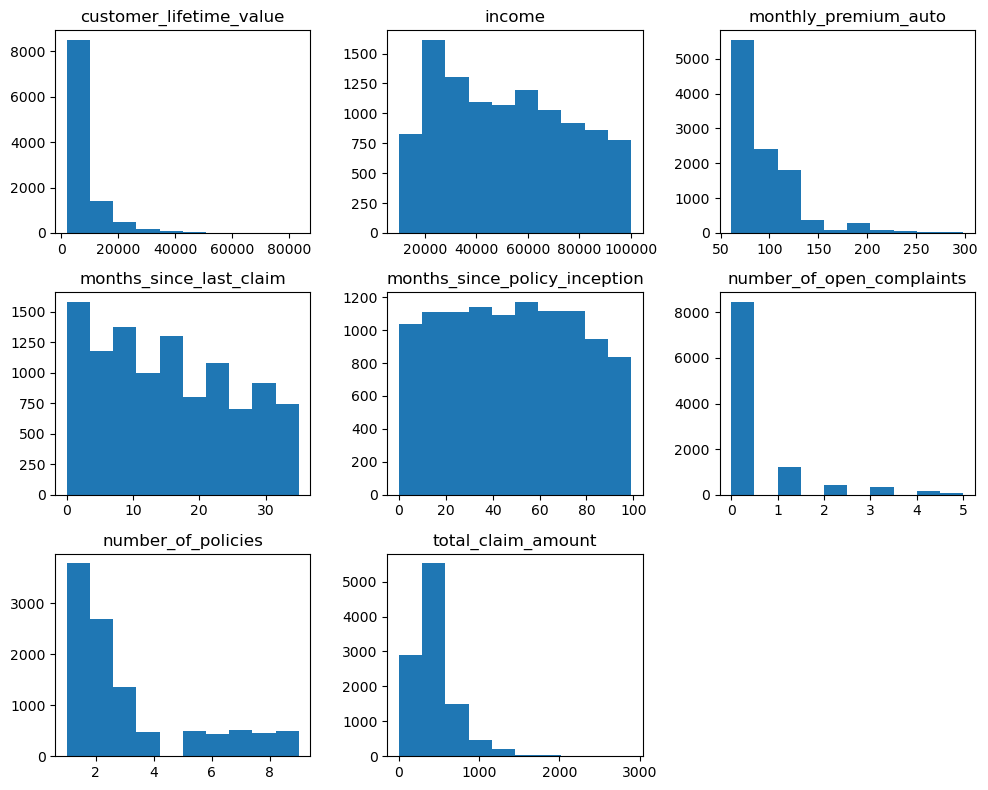

In [12]:
# penguins = sns.load_dataset("penguins")
# sns.histplot(data=penguins, x="flipper_length_mm")

# for i in num_df.keys():
#     sns.histplot(data=num_df[i], bins=10)

# fig, axis = plt.subplots(1, len(num_df.columns))

num_df.hist(figsize=(10, 8), bins=10, grid=False)
plt.tight_layout() 
plt.show()

In [13]:
# customer_lifetime_value = pt
# monthly_premium_auto = pt 
# total_claim_amount = pt 

# income = std
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


In [32]:
pt_df = df[['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount']]
std_df = num_df.drop(pt_df.columns, axis=1)

# will be used for concating later on 
untouched_df = df[['number_of_open_complaints', 'number_of_policies']]

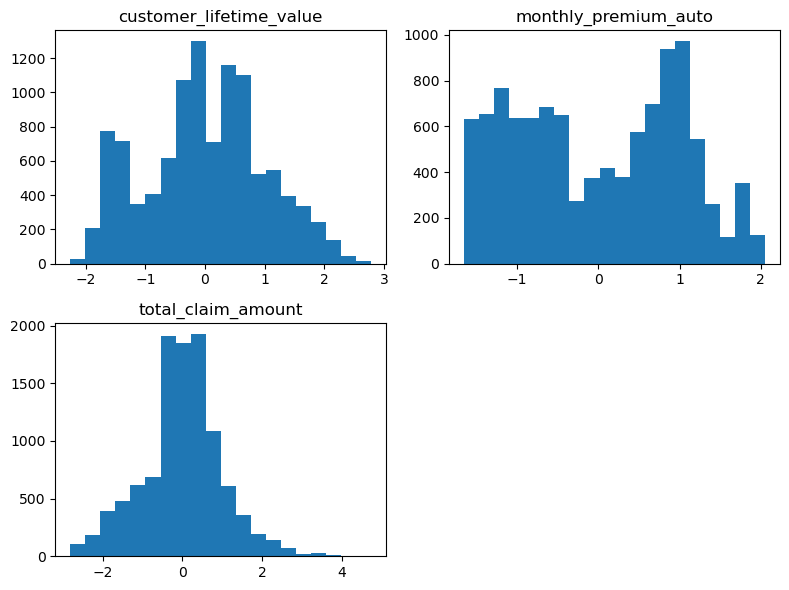

In [33]:
# PowerTransform 

scaler = PowerTransformer()
scaled_data = scaler.fit_transform(pt_df)

pt_df_scaled = pd.DataFrame(scaled_data, columns=pt_df.columns)


pt_df_scaled = df[['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount']] = pt_df_scaled

pt_df_scaled.hist(figsize=(8,6), bins=20, grid=False)
plt.tight_layout()
plt.show()

In [34]:
std_df.info()

# would only MinMax or Std 'income' (std), 'months_since_last_claim'(minmax) , 'months_since_policy_inception(minxmax)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   income                         10689 non-null  int64
 1   months_since_last_claim        10689 non-null  int64
 2   months_since_policy_inception  10689 non-null  int64
 3   number_of_open_complaints      10689 non-null  int64
 4   number_of_policies             10689 non-null  int64
dtypes: int64(5)
memory usage: 417.7 KB


## Not sure if to MinMax or Stdandart scale 

Thinking that maybe 'number_of_open_complaints' & 'number_of_policies' should be regarded as ordinal or at least categorical data


In [35]:
std_to_scale = std_df[['income', 'months_since_last_claim', 'months_since_policy_inception']]

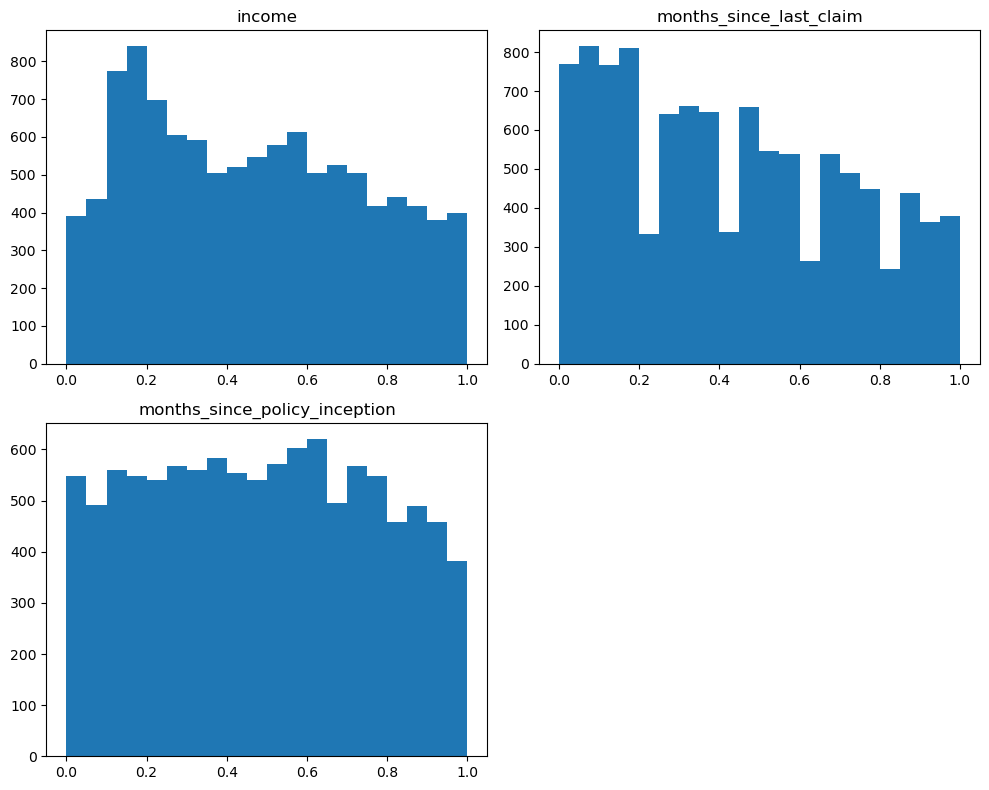

In [36]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(std_to_scale)

scaled_data = scaler.fit_transform(std_to_scale)


scaled_df = pd.DataFrame(scaled_data, columns=std_to_scale.columns)

minmax_df_scaled = std_df[['income', 'months_since_last_claim', 'months_since_policy_inception']] = scaled_df


minmax_df_scaled.hist(figsize=(10,8),bins=20, grid=False)
plt.tight_layout()
plt.show()

In [49]:
# pt_df_scaled
# customer_lifetime_value  
# monthly_premium_auto
# total_claim_amount

# minmax_df_scaled:
# income                       
# months_since_last_claim       
# months_since_policy_inception

# left_overs: 
# number_of_open_complaints     
# number_of_policies

numerical_df = pd.concat([pt_df_scaled, minmax_df_scaled, untouched_df], axis=1)



numerical_df

,customer_lifetime_value,monthly_premium_auto,total_claim_amount,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.331846,-1.654042,-0.355651,0.422396,0.200000,0.525253,0,9
1,-1.878686,-1.311573,1.092502,0.914158,0.085714,0.262626,0,1
2,1.288819,0.673303,0.334392,0.134550,0.971429,0.313131,0,2
3,1.722526,0.587797,0.347342,0.434059,0.285714,0.030303,0,2
4,0.648653,1.047324,0.996012,0.151628,0.942857,0.313131,0,7
...,...,...,...,...,...,...,...,...
10684,1.335277,1.962132,2.146508,0.572623,0.342857,0.404040,0,7
10685,-0.178380,-1.207705,-0.437236,0.568231,0.200000,0.686869,0,6
10686,1.789664,1.793112,-0.006455,0.331317,0.314286,0.636364,0,2
10687,1.021194,1.538446,0.752349,0.602130,0.000000,0.272727,4,6


In [50]:
# CONCAT of t_df and numerical_df 

scaled_df = pd.concat([numerical_df, t_df], axis=1)

In [59]:
scaled_df = scaled_df.drop(['effective_to_date', 'month'], axis=1)


In [69]:
# Final df with all transformed (and dropped) columns 

scaled_df

,customer_lifetime_value,monthly_premium_auto,total_claim_amount,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_class,vehicle_size,...,marital_status_divorced,marital_status_married,marital_status_single,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web
0,-0.331846,-1.654042,-0.355651,0.422396,0.200000,0.525253,0,9,0.0,1.0,...,0,1,0,1,0,0,1,0,0,0
1,-1.878686,-1.311573,1.092502,0.914158,0.085714,0.262626,0,1,0.0,1.0,...,0,0,1,0,1,0,0,0,1,0
2,1.288819,0.673303,0.334392,0.134550,0.971429,0.313131,0,2,4.0,1.0,...,0,0,1,0,1,0,0,0,1,0
3,1.722526,0.587797,0.347342,0.434059,0.285714,0.030303,0,2,0.0,1.0,...,0,0,1,1,0,0,0,1,0,0
4,0.648653,1.047324,0.996012,0.151628,0.942857,0.313131,0,7,0.0,1.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.335277,1.962132,2.146508,0.572623,0.342857,0.404040,0,7,1.0,1.0,...,0,1,0,0,1,0,0,0,0,1
10685,-0.178380,-1.207705,-0.437236,0.568231,0.200000,0.686869,0,6,0.0,1.0,...,0,1,0,0,1,0,0,1,0,0
10686,1.789664,1.793112,-0.006455,0.331317,0.314286,0.636364,0,2,2.0,1.0,...,0,1,0,1,0,0,0,0,0,1
10687,1.021194,1.538446,0.752349,0.602130,0.000000,0.272727,4,6,4.0,1.0,...,1,0,0,0,1,0,0,1,0,0
